<a href="https://colab.research.google.com/github/J-Nformi/Automated-Spotify-Playlists-Creation_ML/blob/Notebooks/Moosic_1_Data_Collection_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook 1: Data Collection and Exploration
Purpose: Acquire and preprocess data, perform initial EDA.

Tasks:
Data loading from Spotify API or file

Data cleaning (handling missing values, outliers)

Initial exploration and visualizations of audio features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from sklearn import set_config

set_config(transform_output='pandas')

#1. Data Collection & Preprocessing:

In [ ]:
url = "https://drive.google.com/file/d/16RXRK8V8cKf1YvG8pz-xN-o9t7SotEhD/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
song_features = pd.read_csv(path)

In [ ]:
song_features.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


#1.1 Drop Duplicates

For a Cluster Analysis we need only numerical columns. Furthermore, we need indices that can be recognized, which is why I decided to use the artist, as well as the name (song title) as index and drop the html and id.

In [ ]:
# Drop duplicates
duplicates = song_features[song_features.duplicated(subset=['artist', 'name'], keep=False)]

In [ ]:
duplicates_to_drop = song_features.duplicated(subset=['artist', 'name'], keep='first')
song_features = song_features[~duplicates_to_drop]

##1.3 Transform Dataframe

In [ ]:
# Set indices
song_features.set_index(['name', 'artist'], inplace =True)

In [ ]:
# Drop the columns
# Also drop type since it is empty
song_features.drop(columns=['html', 'id', 'type'], inplace=True)

<ipython-input-76-e6471c4b09e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_features.drop(columns=['html', 'id', 'type'], inplace=True)


In [ ]:
# Check the Data types of the columns
song_features.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

#1.3 Check for Missing values

In [ ]:
#check missing values

song_features.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## 1.4 Check for Outliers

The data types look good. Now we check for outliers not to drop them, but to decide which scaling method or clustering algorithm to use.

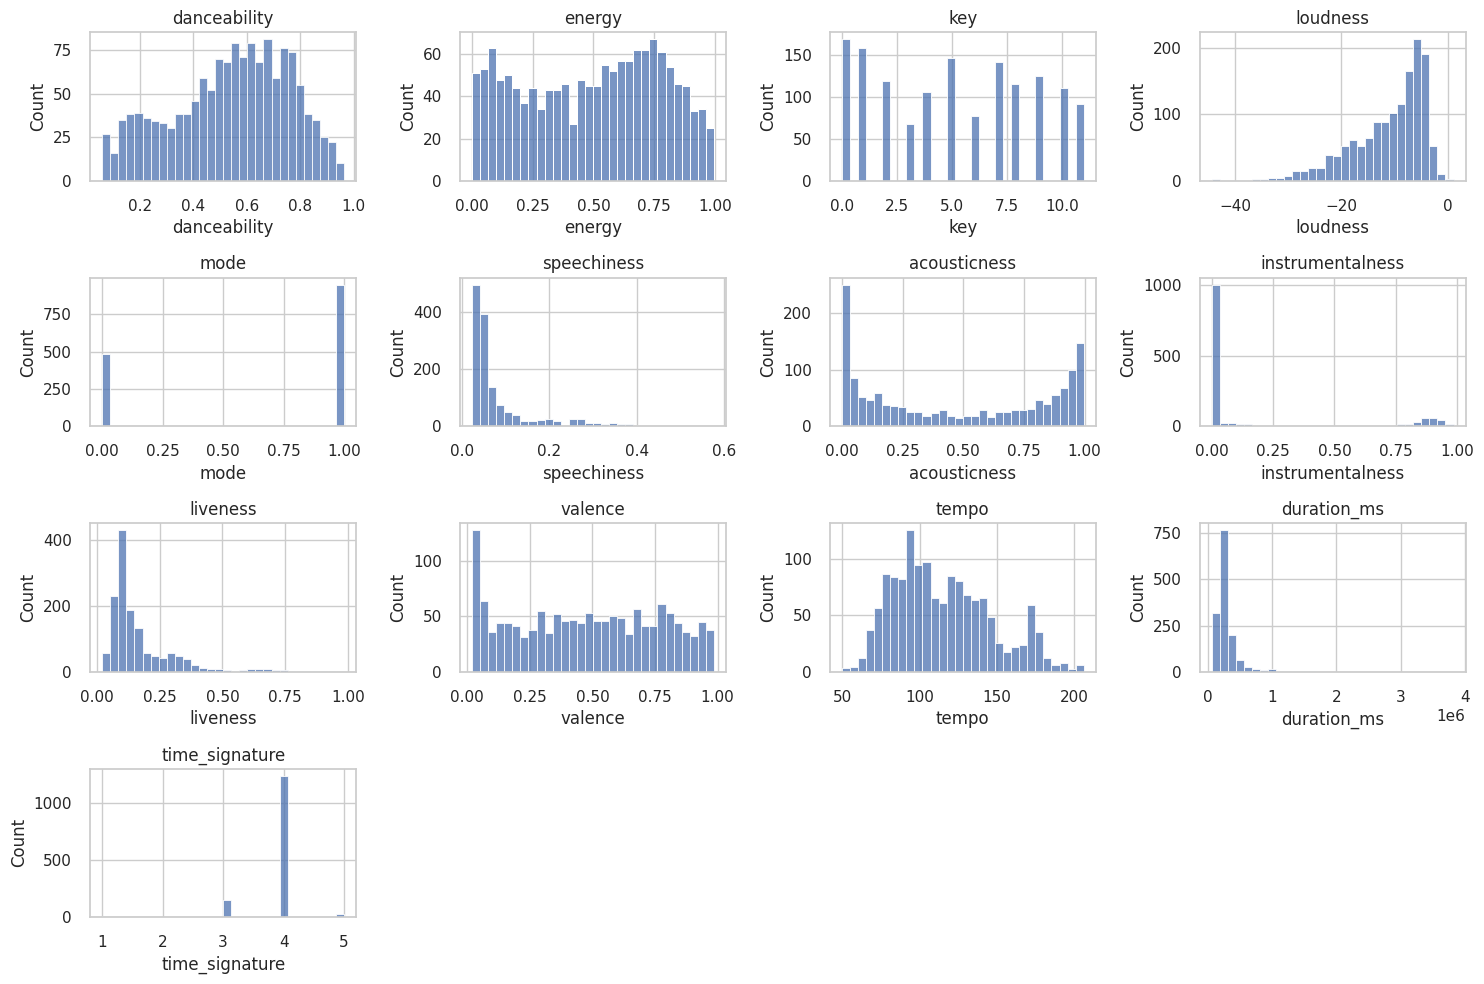

In [ ]:
# Outliers
# Set the size and style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Loop over the columns and create a histogram for each one
for i, column in enumerate(song_features.columns, 1):
    plt.subplot(4, 4, i)  # 5x5 grid for 16 columns
    sns.histplot(song_features[column], kde=False, bins=30)
    plt.title(column)
    plt.tight_layout()

plt.show()

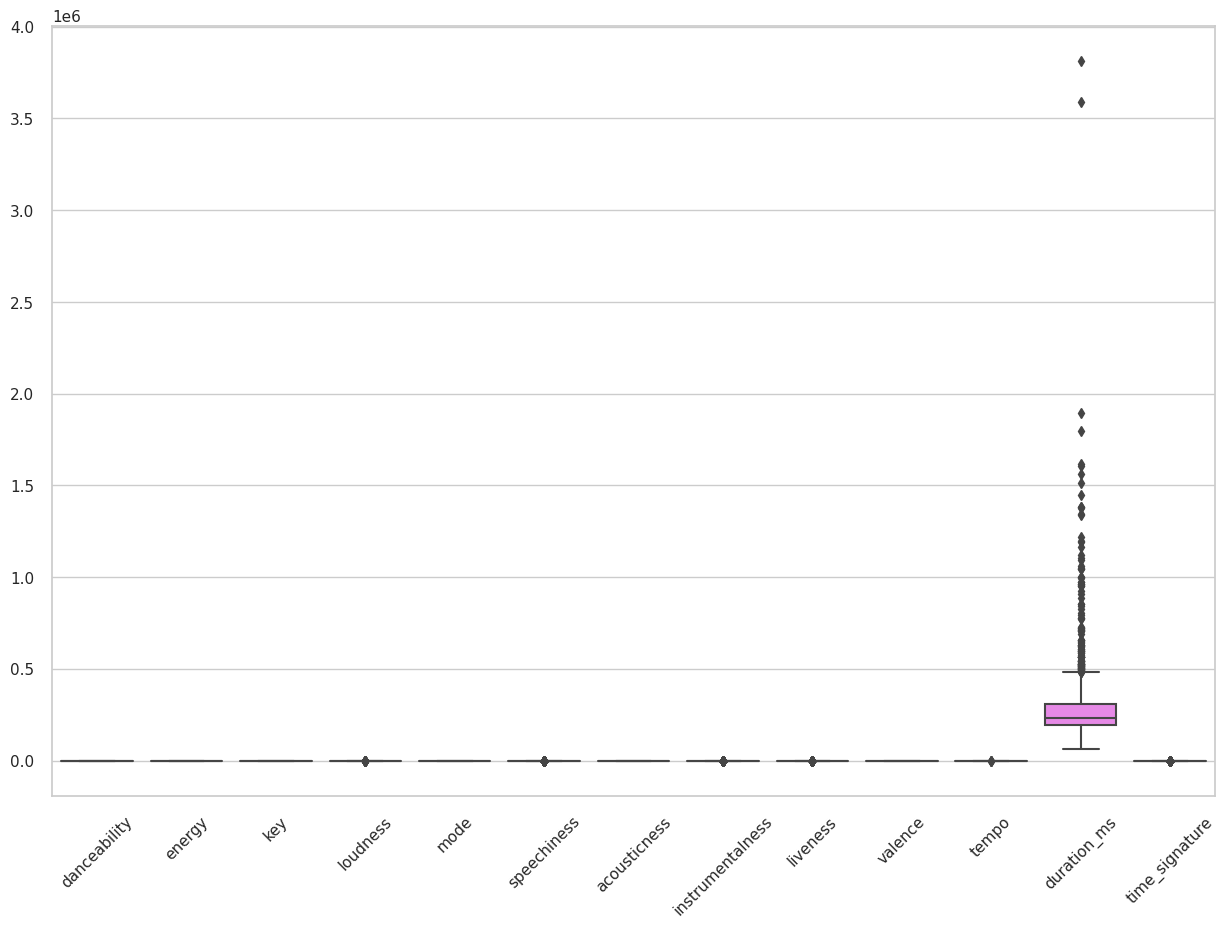

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=song_features)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

In [ ]:
for column in song_features.columns:
    Q1 = song_features[column].quantile(0.25)
    Q3 = song_features[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((song_features[column] < (Q1 - 1.5 * IQR)) | (song_features[column] > (Q3 + 1.5 * IQR))).sum()
    print(f'The {column} has the following outliers: {outliers_iqr}')

The danceability has the following outliers: 0
The energy has the following outliers: 0
The key has the following outliers: 0
The loudness has the following outliers: 28
The mode has the following outliers: 0
The speechiness has the following outliers: 204
The acousticness has the following outliers: 0
The instrumentalness has the following outliers: 304
The liveness has the following outliers: 113
The valence has the following outliers: 0
The tempo has the following outliers: 4
The duration_ms has the following outliers: 117
The time_signature has the following outliers: 192


Export Data

In [ ]:


# Define the file path and name
file_path = '/content/drive/My Drive/DS Bootcamp/Machine Learning/Moosic_Kmeans/song_features_cleaned.csv'

# Export 'songs' to CSV with a new file name
songs.to_csv(file_path, index=False)
